In [1]:
pkg load io
pkg load signal
pkg load control
e4init 

disp('New privately owned housing units started')
house=csvread(
"./MY_DATA/house.csv");
house=house(98:781,2);
size(house)
house=log(house);


                      EEEEEEEEE   444  444
                     EEEEEEEEEEE  444  444
                     EEE          44444444
                     EEE           4444444
                     EEEEEEE           444
                     EEEEEEE           444
                     EEE
                     EEE
                     EEEEEEEEEE
                      EEEEEEEE

Toolbox for State Space Estimation of Econometric Models
                   Version  JAN-2012

Web: www.ucm.es/info/icae/e4
    sete4opt at line 36 column 44
    e4init at line 48 column 1

 
*********************** Options set by user ********************
Filter. . . . . . . . . . . . . : KALMAN
Scaled B and M matrices . . . . : NO
Initial state vector. . . . . . : AUTOMATIC SELECTION
Initial covariance of state v.  : IDEJONG
Variance or Cholesky factor? .  : VARIANCE
Optimization algorithm. . . . . : BFGS
Maximum step length . . . . . . : 0.100000
Stop tolerance. . . . . . . . . : 0.000010
Max. number of iterations . 

In [2]:
addpath('C:\Program Files\PracticasLDHR-main\OctMat')
savepath
addpath('C:\Program Files\PracticasLDHR-main\spcline')
addpath('C:/Program Files/E4withSubspaces')
savepath
addpath('C:\Program Files\E4Matlab')
savepath
addpath('C:\Program Files\PracticasLDHR-main')
savepath
addpath('C:\Program Files\PracticasLDHR-main\functions')
savepath
addpath('C:\Program Files\PracticasLDHR-main')
savepath
addpath('C:\Program Files\PracticasLDHR-main\functions')
savepath

In [3]:
PaPhouse = 12./(0:6); % vector con periodos correspondientes a la estacionalidad para datos mensuales.
TVPaPhouse = [1 1 1 1 1 1 1; 1 0 0 0 0 0 0];
warning('off','all');
[VARhouse, Phouse, TVPhouse, oarhouse] = autodhr(house, 12, [], [35], PaPhouse, TVPaPhouse, 1)
oarhouse; % poner valor de oarhouse en 2[] 
NVRhouse = VARhouse(2:8)./VARhouse(1); % calculation of the variances of the DHR components
filt = 0;
[trendhouse, seasonhouse, cyclehouse, irreghouse] = dhrfilt(house, Phouse, TVPhouse, VARhouse, 12, filt, 0);

VARhouse =

 Columns 1 through 6:

   3.1696e-03   3.1179e-05   7.5149e-05   2.0087e-05   1.0699e-05   1.8350e-05

 Columns 7 and 8:

            0   1.0866e-07

Phouse =

       Inf   12.0000    6.0000    4.0000    3.0000    2.4000    2.0000

TVPhouse =

   1   1   1   1   1   1   1
   1   0   0   0   0   0   0

oarhouse = 35


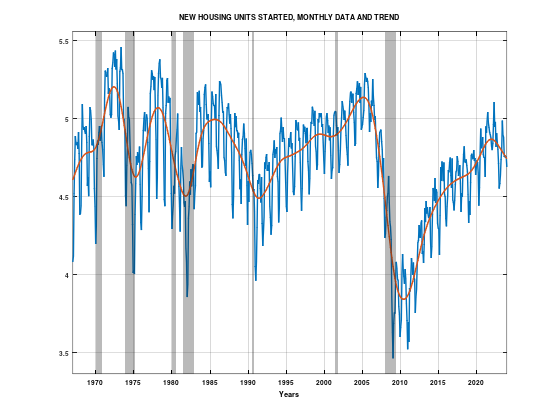

In [111]:
trendhouse = trendhouse(:, 1); % the first column of trend is the trend vector
figure(1)

startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendhouse));  % Generate dates
dates = dates';

plot(dates, [house, trendhouse], 'linewidth', 1.4)
grid on
title('NEW HOUSING UNITS STARTED, MONTHLY DATA AND TREND')

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];
ylim([min(house) - 0.1, max(house) + 0.1]);  % Adjust as needed
y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [5]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1967,1,684); % last input = number of rows of dataset
time=time(3:end,:); % start from third obs since we need the time of differenced trend (1st obs = stringname obs)
disp('FIRST DIFFERENCE OF TREND')
dtrendhouse=diff(trendhouse); % first difference of trend vector
time(5,:)
house(5)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans = 1967-06-01  
ans = 4.8828


In [6]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrechouse = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dtrendhouse) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendhouse(i:i+window-1) < 0) && dtrendhouse(i-1) > 0 
        confirmedrechouse = [confirmedrechouse, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedrechouse = confirmedrechouse'; % to column vector from row vector 
size(dtrendhouse); % the vector we are using
size(time); % checking time vector size
recessiontimehouse = time(confirmedrechouse,:); % DATES OF CONFIRMED RECESSION
recessionhouse = dtrendhouse(confirmedrechouse,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [7]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexphouse = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dtrendhouse) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendhouse(i:i+window-1) > 0) && dtrendhouse(i-1) < 0 
        confirmedexphouse = [confirmedexphouse, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexphouse = confirmedexphouse'; % to column vector from row vector 
size(dtrendhouse); % the vector we are using
size(time); % checking time vector size
expansiontimehouse = time(confirmedexphouse,:); % DATES OF CONFIRMED EXPANSION
expansionhouse = dtrendhouse(confirmedexphouse,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendhouse));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrechouse and confirmedexphouse indices to dates
recessionindhouse = dates(confirmedrechouse);
expansionindhouse = dates(confirmedexphouse);
size(dates);
size(dtrendhouse);

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:


PLOTTING TREND WITH RECESSION AND EXPANSION DATES


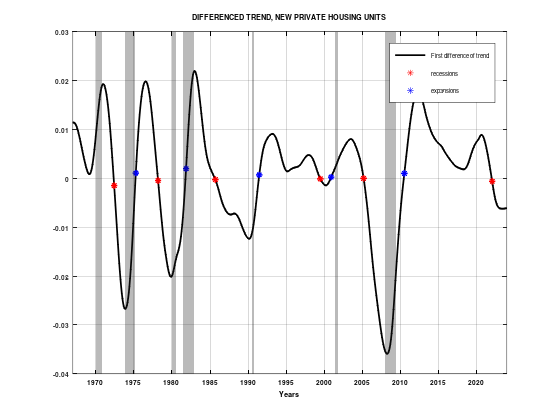

In [8]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(2)
plot(dates,dtrendhouse,'k','linewidth',1.7)
hold on
plot(recessionindhouse, recessionhouse, 'r*', 'linewidth', 1.5); % red are recessions
plot(expansionindhouse, expansionhouse, 'b*', 'linewidth', 1.5); % blue are expansions
grid on

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
title('DIFFERENCED TREND, NEW PRIVATE HOUSING UNITS')
legend('First difference of trend','recessions','expansions')

hold off;

In [9]:
disp('Dates of expansions and recessions - new housing units started')
expansiontimehouse % date when trend derivative >0
recessiontimehouse % date when trend derivative <0

Dates of expansions and recessions - new housing units started
expansiontimehouse =

1975-05-01  
1981-12-01  
1991-07-01  
2000-12-01  
2010-07-01  

recessiontimehouse =

1972-07-01  
1978-04-01  
1985-10-01  
1999-07-01  
2005-03-01  
2022-01-01  



In [10]:
disp('New privately owned building permits authorized')
permits=csvread(
"./MY_DATA/permits.csv");
permits=permits(98:781,2);
size(permits)
permits=log(permits);

New privately owned building permits authorized
ans =

   684     1



In [11]:
PaPpermits = 12./(0:6); % vector con periodos correspondientes a la estacionalidad para datos mensuales.
TVPaPpermits = [1 1 1 1 1 1 1; 1 0 0 0 0 0 0];
[VARpermits, Ppermits, TVPpermits, oarpermits] = autodhr(permits, 12, [], [29], PaPpermits, TVPaPpermits, 1);
NVRpermits = VARpermits(2:8)./VARpermits(1); % calculation of the variances of the DHR components
filt = 0;
[trendpermits, seasonpermits, cyclepermits, irregpermits] = dhrfilt(permits, Ppermits, TVPpermits, VARpermits, 12, filt, 0);

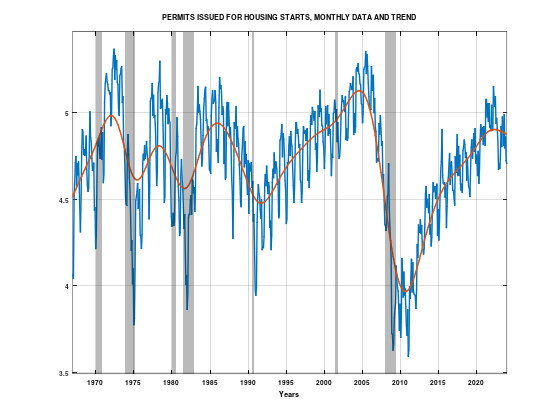

In [113]:
trendpermits = trendpermits(:, 1); % the first column of trend is the trend vector
figure(3)

startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendpermits));  % Generate dates
dates = dates';

plot(dates, [permits, trendpermits], 'linewidth', 1.4)
grid on
title('PERMITS ISSUED FOR HOUSING STARTS, MONTHLY DATA AND TREND')

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

ylim([min(permits) - 0.1, max(permits) + 0.1]);
y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [13]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1967,1,684); % last input = number of rows of dataset
time=time(3:end,:); % start from third obs since we need the time of differenced trend (1st obs = stringname obs)
disp('FIRST DIFFERENCE OF TREND')
dtrendpermits=diff(trendpermits); % first difference of trend vector
time(5,:)
permits(5)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans = 1967-06-01  
ans = 4.7113


In [14]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrecpermits = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dtrendpermits) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendpermits(i:i+window-1) < 0) && dtrendpermits(i-1) > 0 
        confirmedrecpermits = [confirmedrecpermits, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedrecpermits = confirmedrecpermits'; % to column vector from row vector 
size(dtrendpermits); % the vector we are using
size(time); % checking time vector size
recessiontimepermits = time(confirmedrecpermits,:); % DATES OF CONFIRMED RECESSION
recessionpermits = dtrendpermits(confirmedrecpermits,:); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [15]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexppermits = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dtrendpermits) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendpermits(i:i+window-1) > 0) && dtrendpermits(i-1) < 0 
        confirmedexppermits = [confirmedexppermits, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexppermits = confirmedexppermits'; % to column vector from row vector 
size(dtrendpermits); % the vector we are using
size(time); % checking time vector size
expansiontimepermits = time(confirmedexppermits,:); % DATES OF CONFIRMED EXPANSION
expansionpermits = dtrendpermits(confirmedexppermits,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendpermits));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrechouse and confirmedexphouse indices to dates
recessionindpermits = dates(confirmedrecpermits);
expansionindpermits = dates(confirmedexppermits);
size(dates)
size(dtrendpermits)

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:
ans =

   683     1

ans =

   683     1



PLOTTING TREND WITH RECESSION AND EXPANSION DATES


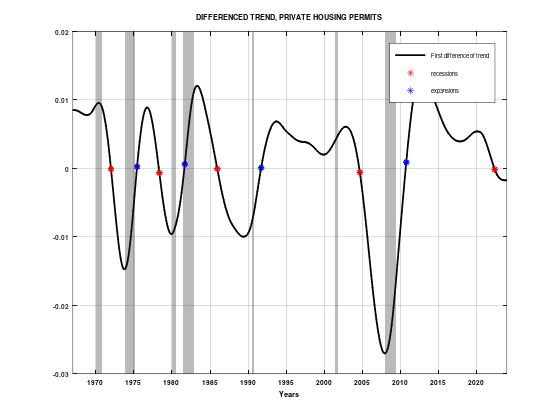

In [16]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(4)
plot(dates,dtrendpermits,'k','linewidth',1.7)
hold on
plot(recessionindpermits, recessionpermits, 'r*', 'linewidth', 1.5); % red are recessions
plot(expansionindpermits, expansionpermits, 'b*', 'linewidth', 1.5); % blue are expansions
grid on

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
title('DIFFERENCED TREND, HOUSING PERMITS ISSUED')
legend('First difference of trend','recessions','expansions')

hold off;

In [17]:
disp('Dates of expansions and recessions - building private housing permits issued')
expansiontimepermits % date when trend derivative >0
recessiontimepermits % date when trend derivative <0

Dates of expansions and recessions - building private housing permits issued
expansiontimepermits =

1975-07-01  
1981-10-01  
1991-10-01  
2010-10-01  

recessiontimepermits =

1972-02-01  
1978-06-01  
1986-01-01  
2004-09-01  
2022-05-01  



In [40]:
disp('Motor vehicle retail sales: domestic autos')
autos=csvread(
"./MY_DATA/autos.csv");
autos=autos(2:685,2);
size(autos)
autos=log(autos);

Motor vehicle retail sales: domestic autos
ans =

   684     1



In [19]:
PaPautos = 12./(0:6); % vector con periodos correspondientes a la estacionalidad para datos mensuales.
TVPaPautos = [1 1 1 1 1 1 1; 1 0 0 0 0 0 0];
[VARautos, Pautos, TVPautos, oarautos] = autodhr(autos, 12, [], [24], PaPautos, TVPaPautos, 1);
NVRautos = VARautos(2:8)./VARautos(1); % calculation of the variances of the DHR components
filt = 0;
[trendautos, seasonautos, cycleautos, irregautos] = dhrfilt(autos, Pautos, TVPautos, VARautos, 12, filt, 0);

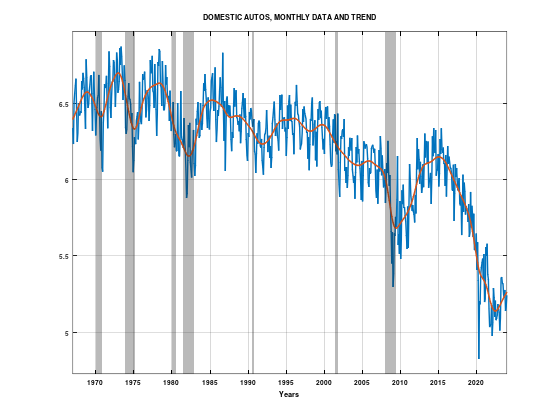

In [114]:
trendautos = trendautos(:, 1); % the first column of trend is the trend vector
figure(5)

startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendautos));  % Generate dates
dates = dates';

plot(dates, [autos, trendautos], 'linewidth', 1.4)
grid on
title('DOMESTIC AUTOS, MONTHLY DATA AND TREND')

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];
ylim([min(autos) - 0.1, max(autos) + 0.1]);  % Adjust as needed
y_lim = ylim;

hold on;  
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [21]:
disp('CREATING TIME VECTOR')
time=timefmt4(12,1967,1,684); % last input = number of rows of dataset
time=time(3:end,:); % start from third obs since we need the time of differenced trend (1st obs = stringname obs)
disp('FIRST DIFFERENCE OF TREND')
dtrendautos=diff(trendautos); % first difference of trend vector
time(5,:)
autos(5)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans = 1967-06-01  
ans = 6.6131


In [22]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrecautos = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dtrendautos) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendautos(i:i+window-1) < 0) && dtrendautos(i-1) > 0 
        confirmedrecautos = [confirmedrecautos, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedrecautos = confirmedrecautos'; % to column vector from row vector 
size(dtrendautos); % the vector we are using
size(time); % checking time vector size
recessiontimeautos = time(confirmedrecautos,:); % DATES OF CONFIRMED RECESSION
recessionautos = dtrendautos(confirmedrecautos,:); % the values in trend that are recession points 

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [23]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexpautos = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dtrendautos) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendautos(i:i+window-1) > 0) && dtrendautos(i-1) < 0 
        confirmedexpautos = [confirmedexpautos, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexpautos = confirmedexpautos'; % to column vector from row vector 
size(dtrendautos); % the vector we are using
size(time); % checking time vector size
expansiontimeautos = time(confirmedexpautos,:); % DATES OF CONFIRMED EXPANSION
expansionautos = dtrendautos(confirmedexpautos,:); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendautos));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrecautos and confirmedexpautos indices to dates
recessionindautos = dates(confirmedrecautos);
expansionindautos = dates(confirmedexpautos);
size(dates)
size(dtrendautos)

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:
ans =

   683     1

ans =

   683     1



PLOTTING TREND WITH RECESSION AND EXPANSION DATES


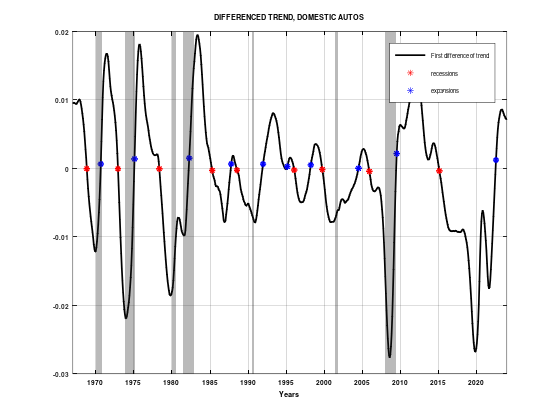

In [24]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(6)
plot(dates,dtrendautos,'k','linewidth',1.7)
hold on
plot(recessionindautos, recessionautos, 'r*', 'linewidth', 1.5); % red are recessions
plot(expansionindautos, expansionautos, 'b*', 'linewidth', 1.5); % blue are expansions
grid on

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
title('DIFFERENCED TREND, DOMESTIC AUTOS')
legend('First difference of trend','recessions','expansions')
hold off;

In [25]:
disp('Dates of expansions and recessions -domestic autos sold')
expansiontimeautos % date when trend derivative >0
recessiontimeautos % date when trend derivative <0

Dates of expansions and recessions -domestic autos sold
expansiontimeautos =

1970-10-01  
1975-03-01  
1982-05-01  
1987-11-01  
1992-01-01  
1995-03-01  
1998-04-01  
2004-07-01  
2009-07-01  
2022-07-01  

recessiontimeautos =

1968-12-01  
1973-01-01  
1978-06-01  
1985-05-01  
1988-08-01  
1996-02-01  
1999-10-01  
2005-12-01  
2015-02-01  



In [55]:
disp('Heavyweight domestic trucks sold')
trucks=csvread(
"./MY_DATA/trucks.csv");
trucks=trucks(2:685,2);
trucks=log(trucks);
size(trucks)

PaPtrucks = 12./(0:6); % vector con periodos correspondientes a la estacionalidad para datos mensuales.
TVPaPtrucks = [1 1 1 1 1 1 1; 1 0 0 0 0 0 0];
[VARtrucks, Ptrucks, TVPtrucks, oartrucks] = autodhr(trucks, 12, [], [28], PaPtrucks, TVPaPtrucks, 1);
NVRtrucks = VARtrucks(2:8)./VARtrucks(1); % calculation of the variances of the DHR components
filt = 0;
[trendtrucks, seasontrucks, cycletrucks, irregtrucks] = dhrfilt(trucks, Ptrucks, TVPtrucks, VARtrucks, 12, filt, 0);
trendltrucks = trendltrucks(:, 1);
oartrucks

Heavyweight domestic trucks sold
ans =

   684     1

oartrucks = 28


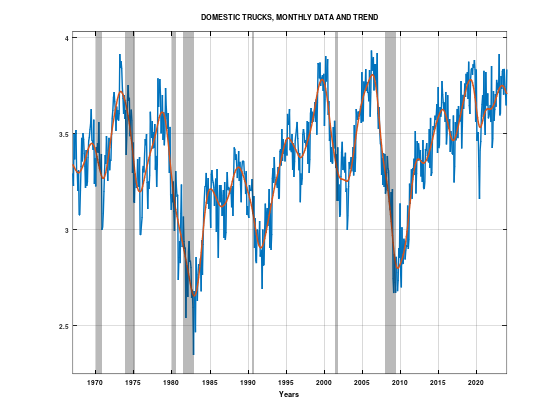

In [106]:
trendtrucks = trendtrucks(:, 1); % the first column of trend is the trend vector
figure(7)

startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(trendtrucks));  % Generate dates
dates = dates';

plot(dates, [trucks, trendtrucks], 'linewidth', 1.4)
grid on
title('DOMESTIC TRUCKS, MONTHLY DATA AND TREND')
hold on;
xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

ylim([min(trucks) - 0.1, max(trucks) + 0.1]);  % Adjust as needed
y_lim = ylim;

for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [108]:
disp('CREATING TIME VECTOR')
time = timefmt4(12, 1967, 1, 684); % last input = number of rows of dataset
time = time(3:end, :); % start from third obs since we need the time of differenced trend (1st obs = stringname obs)

disp('FIRST DIFFERENCE OF TREND')
dtrendtrucks = diff(trendtrucks); % first difference of trend vector
time(5, :)
trucks(5)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans = 1967-06-01  
ans = 3.4689


In [109]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedrectrucks = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dtrendtrucks) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendtrucks(i:i+window-1) < 0) && dtrendtrucks(i-1) > 0 
        confirmedrectrucks = [confirmedrectrucks, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedrectrucks = confirmedrectrucks'; % to column vector from row vector 
size(dtrendtrucks); % the vector we are using
size(time); % checking time vector size
recessiontimetrucks = time(confirmedrectrucks, :); % DATES OF CONFIRMED RECESSION
recessiontrucks = dtrendtrucks(confirmedrectrucks, :); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [116]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexptrucks = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dtrendtrucks) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dtrendtrucks(i:i+window-1) > 0) && dtrendtrucks(i-1) < 0 
        confirmedexptrucks = [confirmedexptrucks, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexptrucks = confirmedexptrucks'; % to column vector from row vector 
size(dtrendtrucks); % the vector we are using
size(time); % checking time vector size
expansiontimetrucks = time(confirmedexptrucks, :); % DATES OF CONFIRMED EXPANSION
expansiontrucks = dtrendtrucks(confirmedexptrucks, :); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dtrendtrucks));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedrectrucks and confirmedexptrucks indices to dates
recessionindtrucks = dates(confirmedrectrucks);
expansionindtrucks = dates(confirmedexptrucks);
size(dates)
size(dtrendtrucks)

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:
ans =

   683     1

ans =

   683     1



PLOTTING TREND WITH RECESSION AND EXPANSION DATES


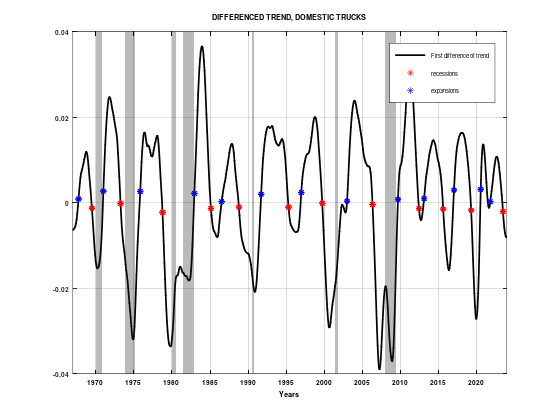

In [117]:
disp('PLOTTING TREND WITH RECESSION AND EXPANSION DATES')

figure(8)
plot(dates, dtrendtrucks, 'k', 'linewidth', 1.7)
hold on
plot(recessionindtrucks, recessiontrucks, 'r*', 'linewidth', 1.5); % red are recessions
plot(expansionindtrucks, expansiontrucks, 'b*', 'linewidth', 1.5); % blue are expansions
grid on

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 3, 1)     % February 2020 to March 2020
];

y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
title('DIFFERENCED TREND, DOMESTIC TRUCKS')
legend('First difference of trend', 'recessions', 'expansions')
hold off;

In [119]:
disp('Dates of expansions and recessions - heavyweight trucks sales')
expansiontimetrucks % date when trend derivative >0
recessiontimetrucks % date when trend derivative <0

Dates of expansions and recessions - heavyweight trucks sales
expansiontimetrucks =

1967-11-01  
1971-02-01  
1975-12-01  
1983-01-01  
1986-08-01  
1991-10-01  
1997-01-01  
2003-01-01  
2009-09-01  
2013-02-01  
2017-01-01  
2020-07-01  
2021-10-01  

recessiontimetrucks =

1969-08-01  
1973-05-01  
1978-11-01  
1985-03-01  
1988-11-01  
1995-05-01  
1999-10-01  
2006-05-01  
2012-06-01  
2015-08-01  
2019-04-01  
2023-06-01  



In [120]:
disp('INDICADOR COMPUESTO')
k=5; # retardo de 5 meses

b = [trendhouse, trendtrucks, trendautos, trendpermits]';

B=b*(eye(length(b))-ones(length(b))/length(b));
size(B);
[V,LAMBDA] = eig(B(:,1:length(b)-k)*B(:,k+1:length(b))'/(length(b)^(1)))
#b = b(:,1:300);

[m,ix]=max(diag(LAMBDA))
Weights=V(:,ix)./sum(V(:,ix)) 

INDICADOR COMPUESTO
V =

  -0.641653  -0.143273   0.677768   0.281741
  -0.223730  -0.524774  -0.019541  -0.803791
  -0.533325   0.799364  -0.120277  -0.338754
  -0.503777  -0.255151  -0.725109   0.399736

LAMBDA =

Diagonal Matrix

   1.8044e-01            0            0            0
            0   1.1627e-01            0            0
            0            0   1.3570e-03            0
            0            0            0   3.4452e-02

m = 0.1804
ix = 1
Weights =

   0.3373
   0.1176
   0.2803
   0.2648



PLOTTING THE COMPOSITE INDICATOR


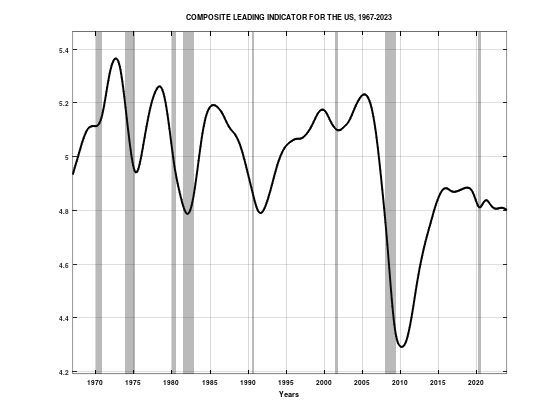

In [99]:
disp('PLOTTING THE COMPOSITE INDICATOR')

startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(cli));  % Generate dates
dates = dates';  % Ensure dates is a column vector

cli=b'*Weights;
figure(9)
plot(dates,cli,'linewidth',1.9,'k-')
grid on
title('COMPOSITE LEADING INDICATOR FOR THE US, 1967-2023')

xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 7, 1)     % February 2020 to March 2020
];

ylim([min(cli) - 0.1, max(cli) + 0.1]);  % Adjust as needed
y_lim = ylim;

hold on;  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.1 0.1 0.1], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
hold off;

In [122]:
disp('CREATING TIME VECTOR')
time = timefmt4(12, 1967, 1, 684); % last input = number of rows of dataset
time = time(3:end, :); % start from third obs since we need the time of differenced trend (1st obs = stringname obs)

disp('FIRST DIFFERENCE OF TREND')
dcli = diff(cli); % first difference of trend vector
time(5, :)
cli(5)

CREATING TIME VECTOR
FIRST DIFFERENCE OF TREND
ans = 1967-06-01  
ans = 4.9665


In [123]:
disp('CONFIRMATION OF A RECESSION')
window = 6; % window size for consecutive negative values
confirmedreccli = []; % array to store the indices of confirmation of a recession

for i = 2:(length(dcli) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dcli(i:i+window-1) < 0) && dcli(i-1) > 0 
        confirmedreccli = [confirmedreccli, i]; % if the condition is met, store the index of the first negative element
    end
end

disp('First negative element preceded by a positive value followed by 6 consecutive negative values:');
confirmedreccli = confirmedreccli'; % to column vector from row vector 
size(dcli); % the vector we are using
size(time); % checking time vector size
recessiontimecli = time(confirmedreccli, :); % DATES OF CONFIRMED RECESSION
recessioncli = dcli(confirmedreccli, :); % the values in trend that are recession points

CONFIRMATION OF A RECESSION
First negative element preceded by a positive value followed by 6 consecutive negative values:


In [125]:
disp('CONFIRMATION OF AN EXPANSION')
window = 6; % window size for consecutive positive values
confirmedexpcli = []; % array to store the indices of confirmation of an expansion

for i = 2:(length(dcli) - window + 1) % starts at 2'nd element to see if the first one >< 0
    if all(dcli(i:i+window-1) > 0) && dcli(i-1) < 0 
        confirmedexpcli = [confirmedexpcli, i]; % if the condition is met, store the index of the first positive element
    end
end

disp('First positive element preceded by a negative value followed by 6 consecutive positive values:');
confirmedexpcli = confirmedexpcli'; % to column vector from row vector 
expansiontimecli = time(confirmedexpcli, :); % DATES OF CONFIRMED EXPANSION
expansioncli = dcli(confirmedexpcli, :); % the values in trend that are expansion points

% Generate the dates vector
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dcli));  % Generate dates
dates = dates';  % Ensure dates is a column vector

% Convert confirmedreccli and confirmedexpcli indices to dates
recessionindcli = dates(confirmedreccli);
expansionindcli = dates(confirmedexpcli);
size(dates)
size(dcli)

CONFIRMATION OF AN EXPANSION
First positive element preceded by a negative value followed by 6 consecutive positive values:
ans =

   683     1

ans =

   683     1



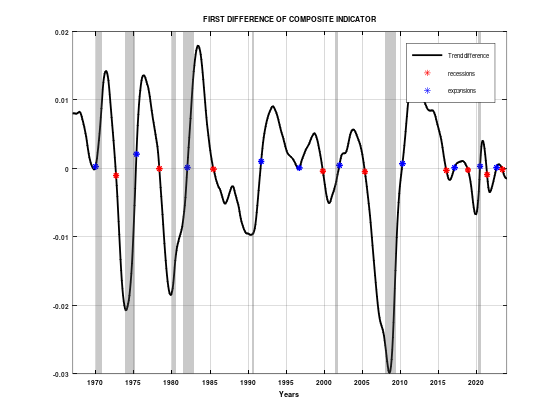

In [127]:
startDate = datenum(1967, 1, 1);  % January 1967
endDate = datenum(2023, 12, 1);   % December 2023
dates = linspace(startDate, endDate, length(dcli));  % Generate dates
dates = dates';  % Ensure dates is a column vector

figure(10)
plot(dates, dcli,'linewidth',1.8,'k-')
hold on
plot(recessionindcli, recessioncli, 'r*', 'linewidth', 1.5); % red are recessions
plot(expansionindcli, expansioncli, 'b*', 'linewidth', 1.5); % blue are expansions
grid on
xlim([startDate endDate]);

% Define the years for x-ticks
years = 1970:5:2025; % Years from 1970 to 2025 in 5-year intervals
xTicks = datenum(years, 1, 1);

set(gca, 'XTick', xTicks);

xLabels = arrayfun(@num2str, years, 'UniformOutput', false);
set(gca, 'XTickLabel', xLabels);
xlabel('Years');

% Increase visibility of x-ticks
set(gca, 'XTickLabelRotation', 45, 'FontWeight', 'bold', 'FontSize', 10, 'XColor', 'k');

% SHADING OF NBER RECESSIONS

% Recession periods
recession_periods = [
    datenum(1970, 1, 1), datenum(1970, 11, 1);   % January 1970 to November 1970
    datenum(1973, 11, 1), datenum(1975, 3, 1);   % November 1973 to March 1975
    datenum(1980, 1, 1), datenum(1980, 7, 1);    % January 1980 to July 1980
    datenum(1981, 7, 1), datenum(1982, 11, 1);   % July 1981 to November 1982
    datenum(1990, 7, 1), datenum(1990, 10, 1);   % July 1990 to October 1990
    datenum(2001, 5, 1), datenum(2001, 11, 1);   % May 2001 to November 2001
    datenum(2008, 1, 1), datenum(2009, 6, 1);    % January 2008 to June 2009
    datenum(2020, 2, 1), datenum(2020, 8, 1)     % February 2020 to March 2020
];

y_lim = ylim;

  % Hold the current plot
for i = 1:size(recession_periods, 1)
    x_vals = [recession_periods(i, 1), recession_periods(i, 2), recession_periods(i, 2), recession_periods(i, 1)];
    y_vals = [y_lim(1), y_lim(1), y_lim(2), y_lim(2)];
    area(x_vals, y_vals, 'FaceColor', [0.3 0.3 0.3], 'EdgeColor', 'none', 'FaceAlpha', 0.3);
end
title('FIRST DIFFERENCE OF COMPOSITE INDICATOR')
legend('Trend difference','recessions','expansions')
hold off;